<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°072

Felipe Asbún - 202010509-K


<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1hG9C4e6Tisw2VTEatGkP_hRmnZNpbXK4" width = "300" align="center"/>


El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento.

* Se solicita ajustar al menos tres modelos de clasificación:
     * Regresión logística
     * K-Nearest Neighbours
     * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_.
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [56]:
# !pip install -U scikit-learn

In [57]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [58]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [59]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [60]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [61]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [62]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non-null   int64
 23  c23     1797 

In [63]:
digits['target'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

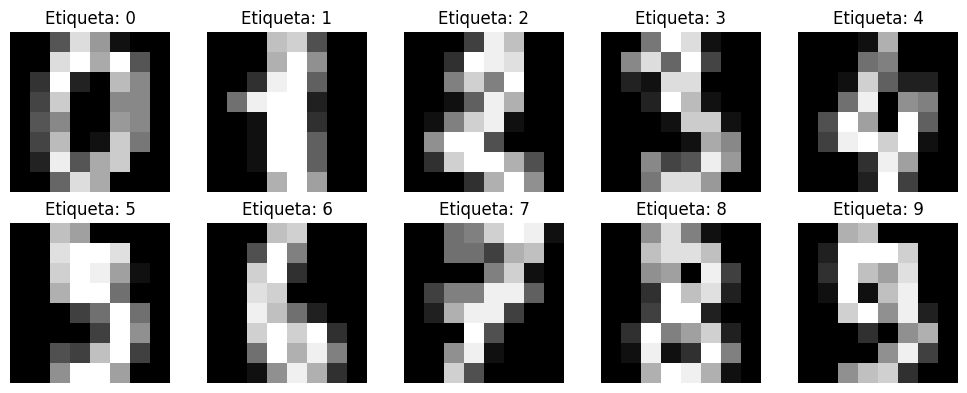

In [64]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.iloc[i, :-1].values.reshape(8, 8), cmap="gray")
    ax.set_title(f"Etiqueta: {digits.iloc[i, -1]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [65]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

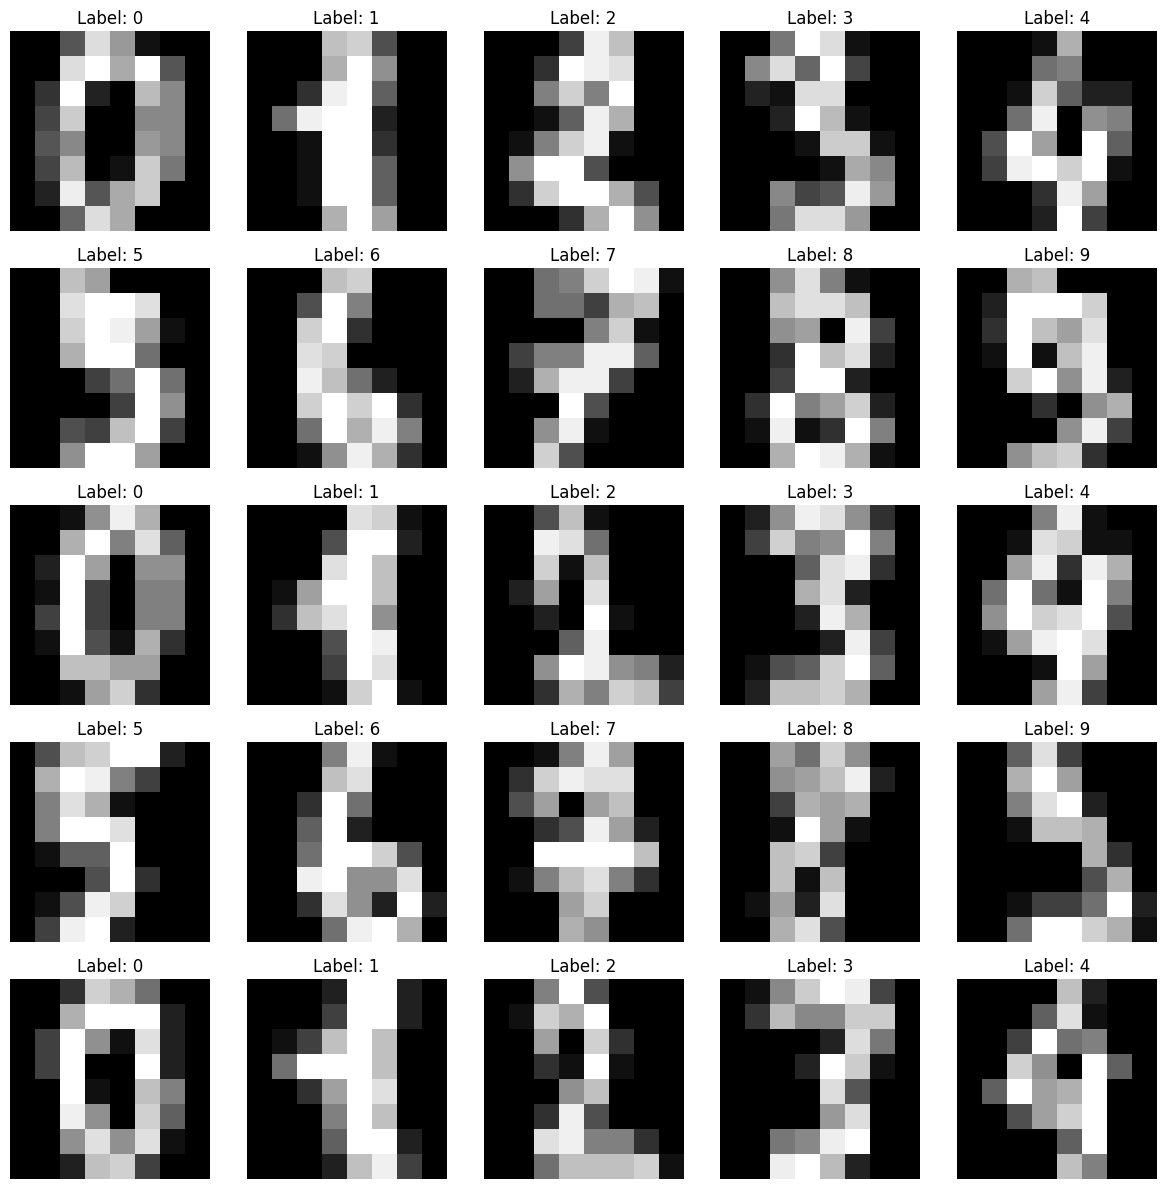

In [66]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))

for i, ax in enumerate(axs.flat):
    ax.imshow(digits_dict["images"][i], cmap="gray")
    ax.set_title(f"Label: {digits_dict['target'][i]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [68]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Reporte de métricas:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        52
           3       0.98      1.00      0.99        56
           4       0.98      1.00      0.99        64
           5       0.99      0.99      0.99        73
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        62
           8       1.00      1.00      1.00        52
           9       0.98      0.96      0.97        68

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594

Tiempo de ejecución:  0.0011527538299560547


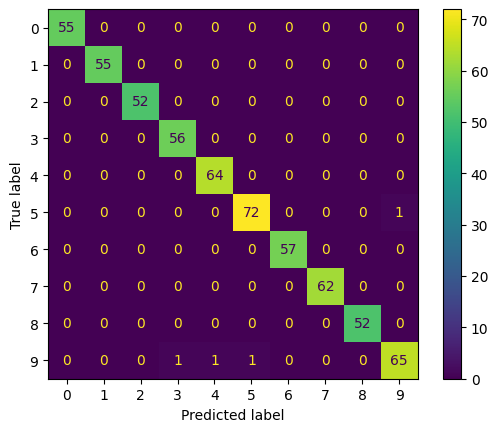

In [69]:
start = time.time()

KNE = KNeighborsClassifier()
KNE.fit(X_train,y_train)

end = time.time()

y_pred = KNE.predict(X_test)
target_names = [str(x) for x in digits['target'].unique()]
print('Reporte de métricas:')
print(classification_report(y_test, y_pred, target_names=target_names))
print('Tiempo de ejecución: ', end-start)

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

Reporte de métricas:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.93      0.91      0.92        55
           2       0.96      1.00      0.98        52
           3       1.00      0.96      0.98        56
           4       0.98      0.98      0.98        64
           5       0.96      0.93      0.94        73
           6       1.00      0.98      0.99        57
           7       0.98      0.98      0.98        62
           8       0.82      0.96      0.88        52
           9       0.98      0.93      0.95        68

    accuracy                           0.96       594
   macro avg       0.96      0.96      0.96       594
weighted avg       0.96      0.96      0.96       594

Tiempo de ejecución:  0.11175060272216797


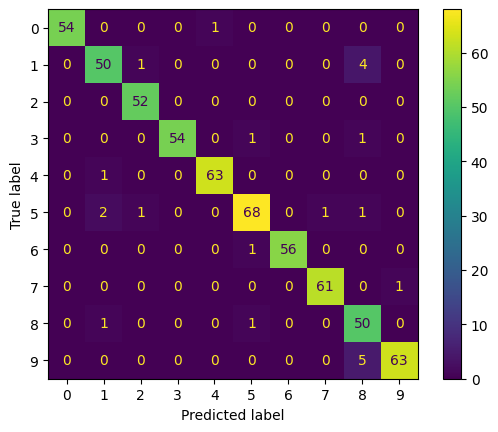

In [70]:
start = time.time()
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train,y_train)
end = time.time()

y_pred = LR.predict(X_test)
target_names = [str(x) for x in digits['target'].unique()]
print('Reporte de métricas:')
print(classification_report(y_test, y_pred, target_names=target_names))
print('Tiempo de ejecución: ', end-start)

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

Reporte de métricas:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.98      1.00      0.99        55
           2       1.00      1.00      1.00        52
           3       0.98      0.98      0.98        56
           4       1.00      1.00      1.00        64
           5       1.00      0.99      0.99        73
           6       0.98      1.00      0.99        57
           7       0.98      0.98      0.98        62
           8       0.96      0.96      0.96        52
           9       0.97      0.96      0.96        68

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594

Tiempo de ejecución:  0.03132438659667969


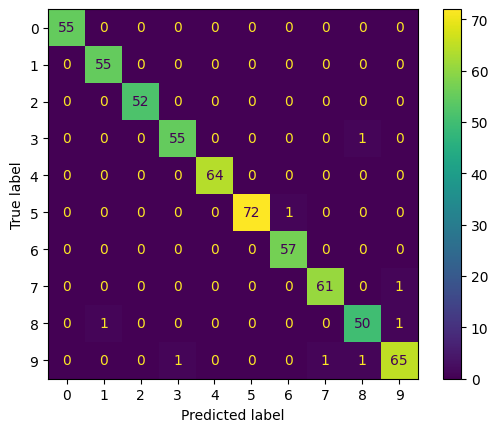

In [71]:
start = time.time()
svc = SVC()
svc.fit(X_train,y_train)
end = time.time()

y_pred = svc.predict(X_test)
target_names = [str(x) for x in digits['target'].unique()]
print('Reporte de métricas:')
print(classification_report(y_test, y_pred, target_names=target_names))
print('Tiempo de ejecución: ', end-start)

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

* ¿Cuál modelo es mejor basado en sus métricas?
    * El modelo con mejores métricas es KNE, pues es quien tiene mayor f1-score respecto a las demás en todas las predicciones. Además, tiene un accuracy igual de bueno que SVC y mejor que el del regresor logístico.
* ¿Cuál modelo demora menos tiempo en ajustarse?
    * El modelo que menos tarda en ajustarse en KNE, con un tiempo de tan solo ~0.0013s, en comparación a los ~0.1284 del regresor logístico y ~0.0432 del SVC.
* ¿Qué modelo escoges?
    * Escogo KNE por el ser el que presenta mejores métricas y mejor tiempo de ajuste.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

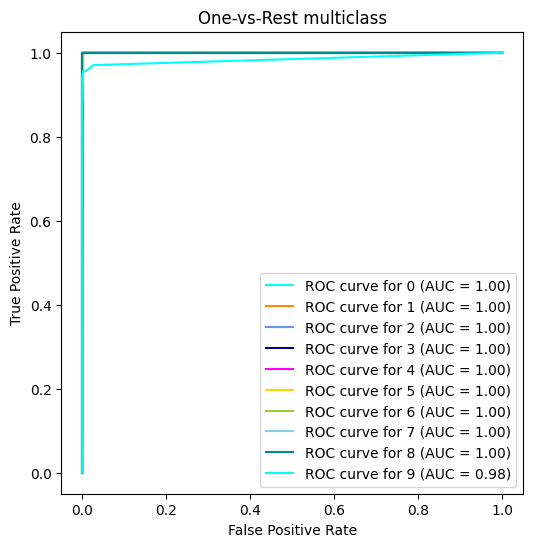

In [72]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer


from itertools import cycle

n_classes = len(target_names)
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_score = KNE.predict_proba(X_test)

fig, ax = plt.subplots(figsize=(6, 6))

colors = cycle(["aqua", "darkorange", "cornflowerblue",
                'darkblue', 'magenta', 'gold',
                'yellowgreen', 'skyblue', 'darkcyan'])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        # plot_chance_level=True,
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest multiclass")
plt.legend()
plt.show()


### Ejercicio 5

---




__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [73]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    for i in range(nx):
        for j in range(ny):
            if not ax[i,j].has_data():
                fig.delaxes(ax[i,j])
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Valores predichos correctamente:


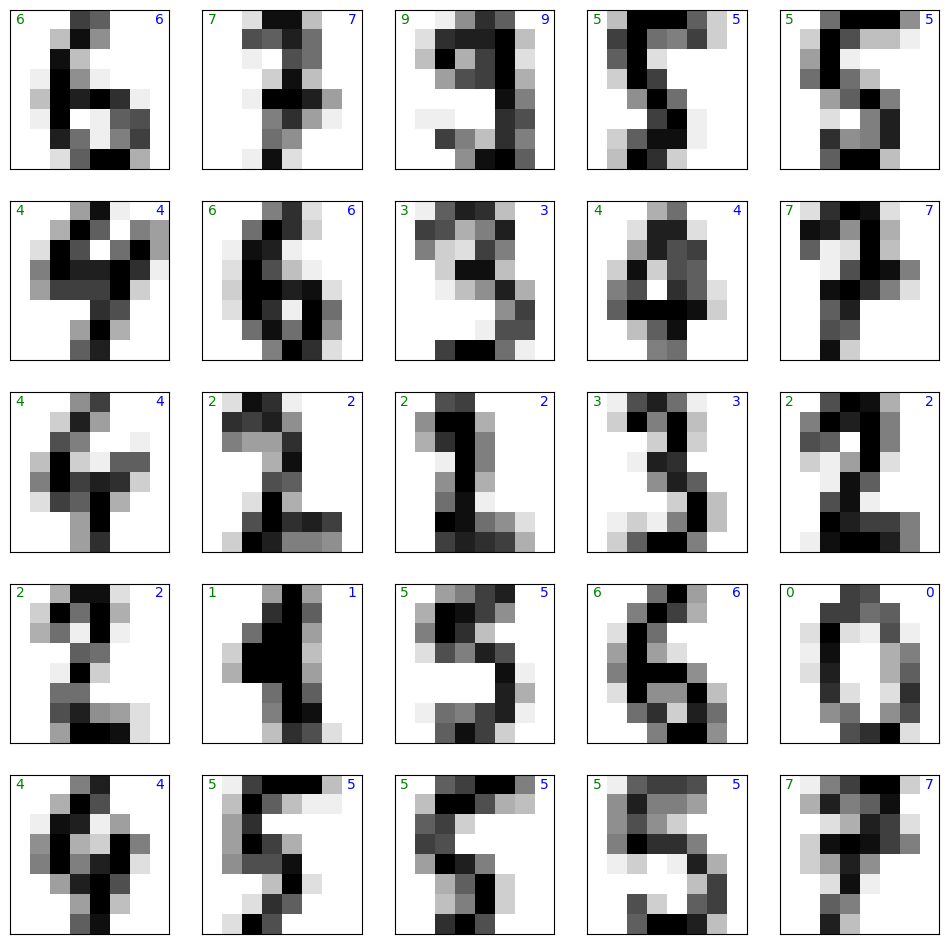


Valores predichos incorrectamente:


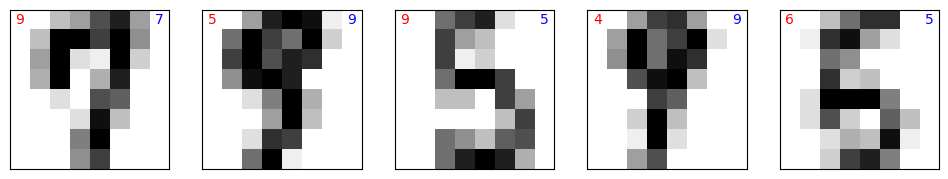

In [75]:
print('Valores predichos correctamente:')
mostrar_resultados(digits, KNE, nx=5, ny=5, label="correctos")
print('\nValores predichos incorrectamente:')
mostrar_resultados(digits, KNE, nx=5, ny=5, label="incorrectos")

Puede que el modelo se equivoque en tales casos por tener ejemplos similares clasificados con la categoría que el modelo predice. Por ejemplo, el último caso de abajo a la derecha de los clasificados correctamente es similar al primer caso de los predichos incorrectamente, teniéndo formas similares.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Todos los modelos muestran buenas métricas respecto a los datos presentados. Es interesante preguntarse si con una mayor cantidad de datos o una mayor resolución en las imágenes, estos modelos se generalizan bien, en el sentido de si mantienen sus métricas o si algún modelo decae a medida que crecen los datos.

También sería interesante ver que sucede si hay más caracteres identificables, o se presentan datos con clasificaciones nuevas a los modelos.